## EDA for Hours Spent on Labs Survey

In [1]:
suppressPackageStartupMessages(library(tidyverse))
options(warn=-1)
suppressPackageStartupMessages(library(cowplot))

This analysis will investigate the following question:

*How does the number of times a Master of Data Science (MDS) student goes to office hours affect the average number of hours they spend working on labs per week?*

based on the results collected from this [survey](https://ubc-mds.slack.com/archives/C24HU8X0W/p1554330074049900). The raw data for this study is stored in the following [repo](https://github.ubc.ca/bettybhz/Hours_Spent_On_Labs_Survey_Data).

In [3]:
# Load survey data
rawdata = suppressMessages(read_csv("../Hours_Spent_On_Labs_Survey_Final.csv"))

In [4]:
# Data cleaning
raw_df = data.frame(rawdata)
row_to_remove = c(1:2)
col_to_remove = c(1,2,4,8,13,14)
df = raw_df[-row_to_remove, -col_to_remove]
names(df) <- c("attend_OH", "lab_hours", "group", "academic", "yrs_out_school", "program", "stat", "optional")
df <- df %>% mutate(optional= as.integer(optional), stat= as.integer(stat), program= as.integer(program), lab_hours=as.integer(lab_hours), attend_OH= as.integer(attend_OH), group = as.factor(group), academic = as.factor(academic), yrs_out_school= as.integer(yrs_out_school)) %>% select (lab_hours, everything())


In [9]:
# Put years out of school into groups
df$yrs_group <- cut(df$yrs_out_school, breaks=c(0, 3, 6,16), right = FALSE, labels = c("0-2","3-5","5+"))
df<- df[,-5]

In [10]:
df

lab_hours,attend_OH,group,academic,program,stat,optional,yrs_group
20,0,Mostly alone,Engineering,3,2,3,0-2
20,2,Mostly alone,Science,3,3,4,0-2
15,0,Mostly alone,Business,4,2,1,0-2
19,4,Mostly in groups,Math,3,3,1,5+
20,0,Mostly alone,Engineering,4,3,1,0-2
30,5,Mostly in groups,Math,2,2,3,5+
20,0,Mostly in groups,Math,3,4,3,0-2
15,0,Mostly in groups,Math,2,5,2,3-5
50,3,Mostly in groups,Math,2,4,2,3-5
36,2,Mostly in groups,Engineering,1,3,2,5+


### I- Variables description 

- **lab_hours**: Average number of hours a student spends working on labs per week (integer)


- **attend_OH**: Number of times a student attends office hours per week (integer)


- **group**: Working style 'mostly in groups' or 'mostly alone'


- **academic**: Academic background (Engineering, Science, Business, Math, Other)


- **yrs_out_school**: Number of years a student was out-of-school (to the nearest year, integer) before the program


- **program**: Programming skills, from 1 (low) to 5 (high)


- **stat**: Statistical skills, from 1 (low) to 5 (high)


- **optional**: How frequently a student does optional questions, 1 (never) to 5 (always)

### II- Summary Table

In [46]:
summary(df)

   lab_hours       attend_OH                  group           academic 
 Min.   : 5.00   Min.   :0.000   Mostly alone    :38   Business   : 8  
 1st Qu.:19.75   1st Qu.:0.000   Mostly in groups:18   Engineering:15  
 Median :20.00   Median :2.000                         Math       :14  
 Mean   :25.54   Mean   :1.527                         Other      : 4  
 3rd Qu.:31.25   3rd Qu.:2.000                         Science    :15  
 Max.   :60.00   Max.   :5.000                                         
                 NA's   :1                                             
 yrs_out_school      program           stat          optional     yrs_group
 Min.   : 0.000   Min.   :1.000   Min.   :1.000   Min.   :1.000   0-2:30   
 1st Qu.: 0.750   1st Qu.:2.750   1st Qu.:2.000   1st Qu.:2.000   3-5:13   
 Median : 2.000   Median :3.000   Median :3.000   Median :2.000   5+ :13   
 Mean   : 3.375   Mean   :2.982   Mean   :2.946   Mean   :2.464            
 3rd Qu.: 5.000   3rd Qu.:4.000   3rd Qu.:4.

> 56 students participated in the survey :
- The variable `attend_OH` has 1 missing value
- The range of the explanatory variables is as expected as per the min and max values
- The average number of hours spent on labs per week varies from 5 to 60

###  III- Exploring the distribution of explanatory variables

In [47]:
# Gathering the data to be able to facet on all variables
#df["out_of_school"]= sprintf('%02d',as.numeric(df[['yrs_out_school']]))

df2 <- df %>% select("attend_OH","group","academic","program","stat","optional","yrs_group")  %>% 
    drop_na()  %>% 
    gather(variable,value) %>%
    group_by(variable, value) %>% 
    summarize(Count=n())

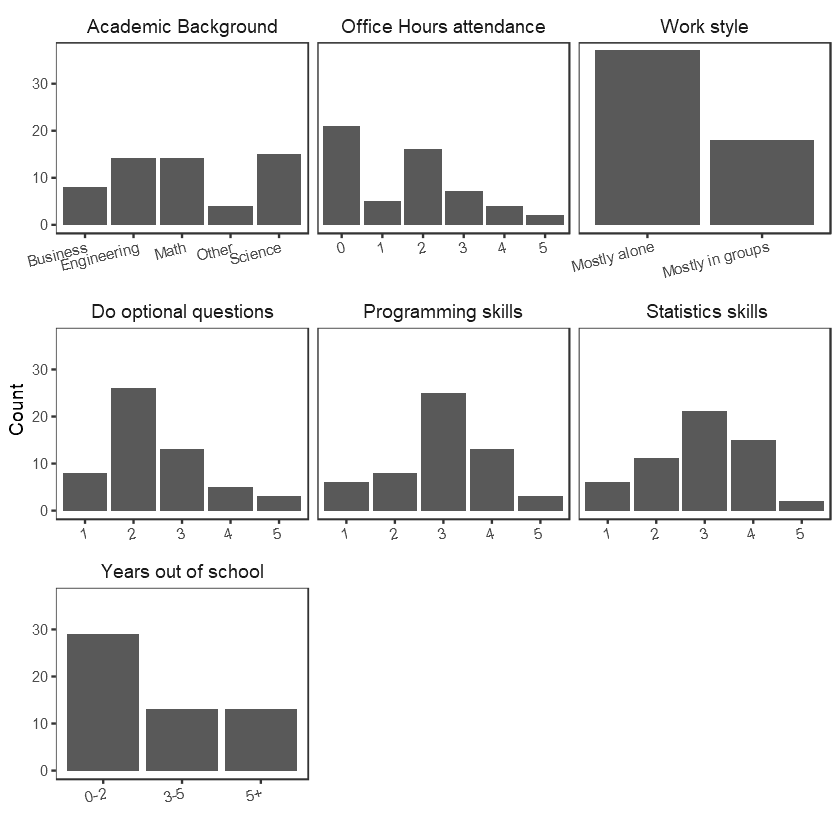

In [48]:
#Plots
labels<- c(
    `academic`="Academic Background",
    `attend_OH`="Office Hours attendance",
    `group`="Work style",
    `optional`="Do optional questions",
    `program`= "Programming skills",
    `stat`=" Statistics skills",
    `yrs_group`= "Years out of school"
)

ggplot(df2,aes(x=value, y=Count))+ 
        geom_bar( stat="identity")+
        facet_wrap(~variable, scales="free_x", labeller=as_labeller(labels))+
        theme_bw()+ 
        theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11),
            axis.text.x = element_text(angle = 14, hjust = 1))+
        xlab("")+
        ylab("Count")

#### Observations:
- Most students' academic background is in Engineering, Math and Science. 
- There are more sudents that mostly work alone than students that mostly work in groups.
- Most students assessed their programming and statistical skills as average.
- The majority of students do not attend office hours. Followed by those that attend office hours 2 times per week on average.
- Most students enrolled in the program right after their undergraduate degree. The longest a participant was out of school before the program is 15 years.

### IV- Exploring the relationship between variables

#### 1- Attending office hours and average number of hours spent on lab

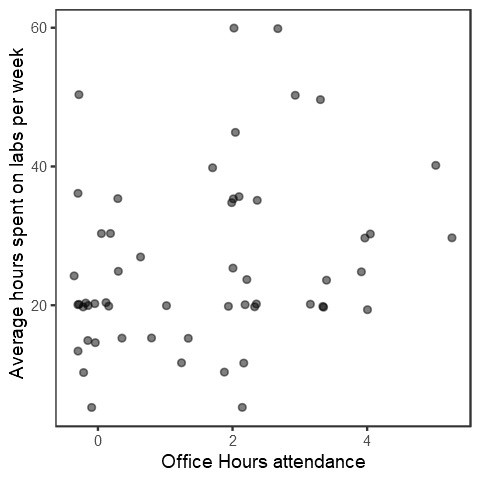

In [24]:
options(repr.plot.width = 4, repr.plot.height = 4)
df %>% 
ggplot(aes(attend_OH, lab_hours)) +
    geom_jitter(alpha=0.5) +
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
labs(x="Office Hours attendance", y="Average hours spent on labs per week")

#### Observations:  

 Average number of hours spent on labs per week does not seem to be related to office hours attendance

#### 2- Facetting by potential confounding variables

> a- **Optional questions**

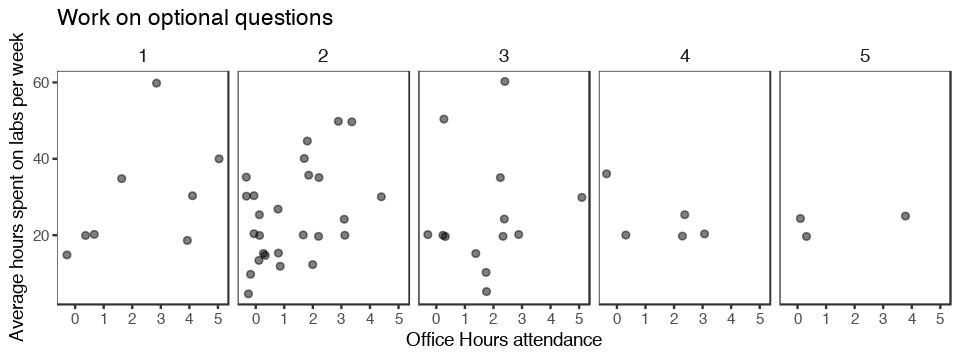

In [10]:
options(repr.plot.width = 8, repr.plot.height = 3)
df %>% 
drop_na()  %>% 
ggplot(aes(attend_OH, lab_hours)) +
    facet_grid(.~optional,scales="free_y") +
    geom_jitter(alpha=0.5) +
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
    ggtitle('Work on optional questions') +
labs(x="Office Hours attendance", y="Average hours spent on labs per week")

#### Observations: 

The students who work on optional questions 'sometimes" (`optional`=2) seem to have a positive association between the number of times they attend office hours and the average number of hours they spend on labs per week. There is no apparent trends in the other groups.

> b- ** Number of years out of school**

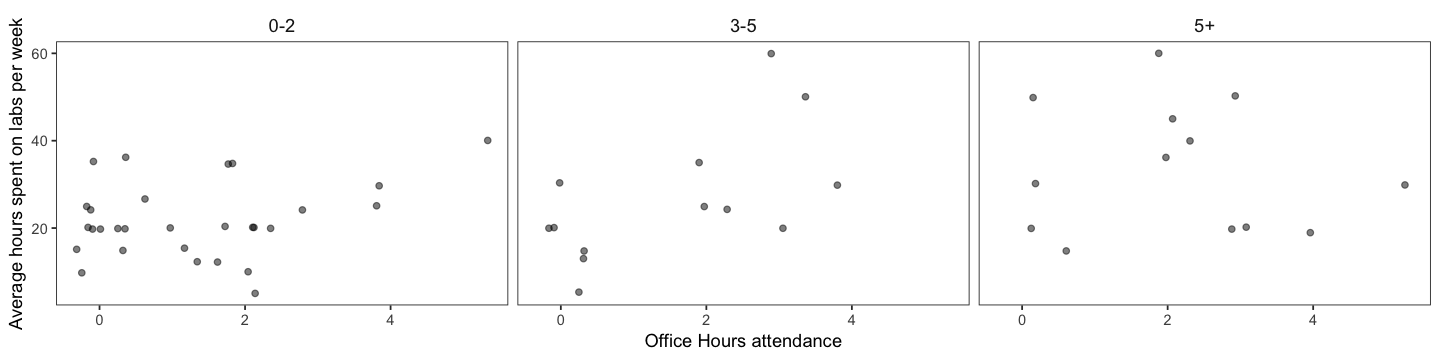

In [18]:
options(repr.plot.width = 12, repr.plot.height = 3)
df %>% 
drop_na() %>% 
ggplot(aes(attend_OH, lab_hours)) +
    facet_grid(.~yrs_group,scales="free_y") +
    geom_jitter(alpha=0.5) +
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
labs(x="Office Hours attendance", y="Average hours spent on labs per week")

#### Observations: 

There is not enough observations in each category to make a definite conclusion on how years out of school affects the relationship between average hours spent on labs and office hours attended.

> c- **Academic background and working style**

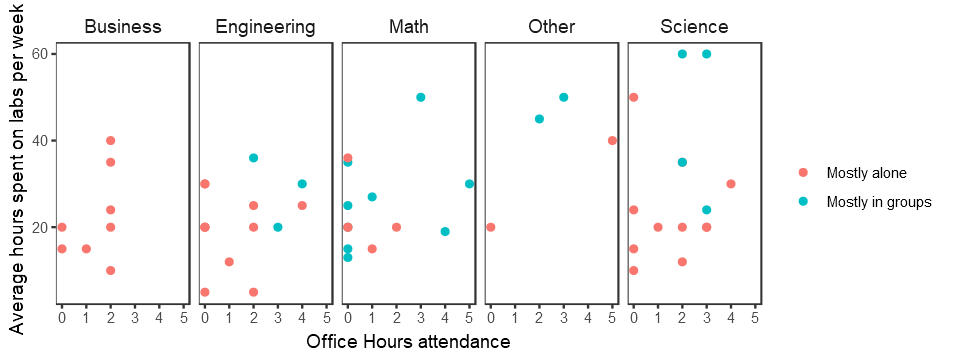

In [25]:
options(repr.plot.width = 8, repr.plot.height = 3)
df %>% 
    drop_na() %>% 
    ggplot(aes(attend_OH, lab_hours)) +
    geom_point(aes(color = group)) +
    facet_grid(~ academic) +
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
    labs(x="Office Hours attendance", y="Average hours spent on labs per week")+
    guides(color = guide_legend(""))

#### Observations: 

According to the plot, it seems like MDS students with a business background tend to work alone and students with a math background tend to work in groups. There is no obvious pattern showing the students with a certain background finish labs faster. However, the plot suggest that people who work alone are more likely to spend fewer hours on the lab and less likely to attend office hours.

> d- **Programming skills and statistical skills**

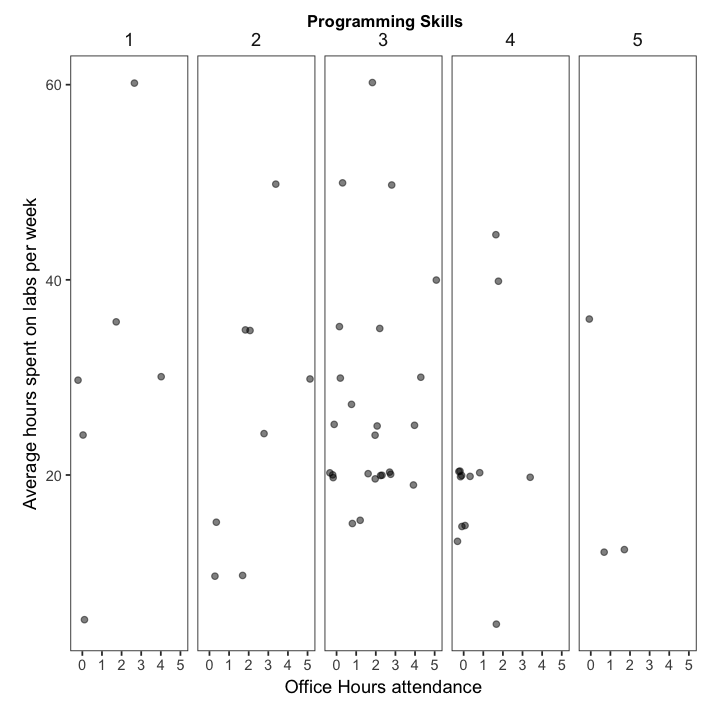

In [17]:
options(repr.plot.width = 6, repr.plot.height = 6)

stats_prog_plot <- df %>% 
drop_na()  %>% 
ggplot(aes(attend_OH, lab_hours)) +
    facet_grid(.~program,scales="free_y", labeller = label_context) +
    geom_jitter(alpha=0.5) +
    #geom_smooth(method="lm", se=FALSE)+
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
labs(x="Office Hours attendance", y="Average hours spent on labs per week") 

# add top and right axis labels (source:https://stackoverflow.com/questions/37785681/axis-labels-for-facet-grid-of-ggplot?noredirect=1&lq=1)
ggdraw(stats_prog_plot) + theme(plot.margin=unit(c(3,3,3,3),"mm")) + 
draw_label("Programming Skills", x = 0.65, y = 1, vjust = 1, hjust = 1, size = 10, fontface = 'bold')

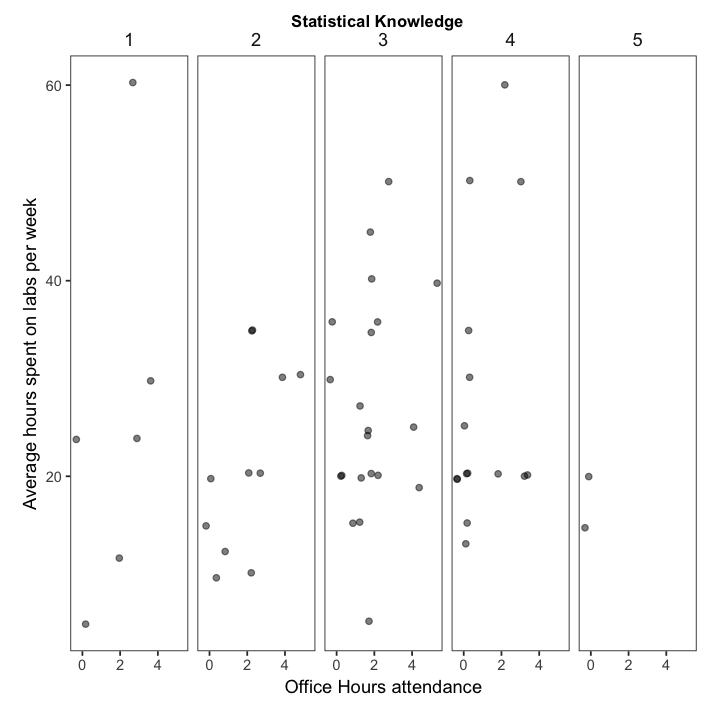

In [19]:
options(repr.plot.width = 6, repr.plot.height = 6)

stats_prog_plot <- df %>% 
drop_na()  %>% 
ggplot(aes(attend_OH, lab_hours)) +
    facet_grid(.~stat,scales="free_y", labeller = label_context) +
    geom_jitter(alpha=0.5) +
    #geom_smooth(method="lm", se=FALSE)+
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
labs(x="Office Hours attendance", y="Average hours spent on labs per week") 

# add top and right axis labels (source:https://stackoverflow.com/questions/37785681/axis-labels-for-facet-grid-of-ggplot?noredirect=1&lq=1)
ggdraw(stats_prog_plot) + theme(plot.margin=unit(c(3,3,3,3),"mm")) + 
draw_label("Statistical Knowledge", x = 0.65, y = 1, vjust = 1, hjust = 1, size = 10, fontface = 'bold')

#### Observations: 

Programming and statistical skills do not seem to have an impact on the relationship between office hours attendance and the average number of hours spent on labs per week.

### V- Conclusion

When other variables are not factored in, attending office hours does not seem to impact the average number of hours a student spends on labs per week. 

Working style , solving optional questions and number of years out of school seem to be relevant confounding variables.